## 基于Python的基金定投分析

通过获取过去10年的股市数据分析基金定投的收益率。

**提交要求**：
- 必须用Jupyter Notebook完成，保存为ipynb格式提交
- 提交文件名为“Python数据分析第4次作业+班级+姓名.ipynb” （注：请规范文件名）
- 提交到刘顿同学的邮箱 810792334@qq.com
- 提交的截止时间为2019年3月15日下午17:00

[参考]  <a href="https://www.zhihu.com/question/35163926/answer/839797133">基金定投一定赚钱吗？</a>

#### 首先，什么是基金？
简单的说，基金是一种募集资金的产品；或者通俗一点来讲就咱们把钱交给专业的人士投资，也就是基金经理，他把咱们的钱投资到股票、债券、货币市场等，好比服装厂加工、设计制作衣服一样，可能你会生产很多服装布料，但是不会制作衣服，那加工产就负责把你提供的一堆布料等联合设计啊，品牌啊等，把她生产出来，变成可以穿的衣服 。

专业的事，交给专业的人做。那基金呢又可分为以下几类：
1. 募集起来的钱去投资各公司的股票，就是股票基金；
2. 募集起来的钱去投资国债、地方债、企业债等，就是债券基金
3. 募集起来的钱去投资银行短期理财、现金等，就是货币基
4. 募集起来的钱又去投资股票、又去投资债券，就是混合型基金。

所以要看基金种类，得具体看拿去买了什么--- 然后，还有一种稍微复杂一点的基金，叫做**指数基金**。

#### 那么，什么是指数基金？

大家应该能理解股票指数就是指按照一定的规则所选择的股票的平均值。比如
1. 上证50指数：就是把上海证券交易所规模最大、流动性最好的50家公司的股票统计起来的股票平均值。
2. 沪深300指数：就是把上交所和深交所前300只规模最大、流动最好的300家公司的股票统计起来的股票平均值。
3. 中证500指数：把沪深300指数的前300家大公司排除，剩下的大公司中再选前500只规模最大、流动最好的500家公司的股票统计起来的股票平均值。

总结概括：指数基金即按照某选股规则选出来的一堆股票的集合，美名曰：**指数基金**


#### 什么是基金定投？
基金定投，就是按照固定的频率和固定的金额，不停分批次小额买入金融市场上的基金。为什么要这么麻烦，这样做有什么好处吗？我们本次“数据分析和挖掘”的第四次作业就**指数基金定投**的效果来分析一下。

注：定投可以选择任何种类的基金。我们以指数基金为例，因为大部分传说中**无脑定投**的案例都是以指数基金的定投方式

#### 数据来源：
- 通过API接口从网易财经上进行调取

#### 接口规范
 - http://quotes.money.163.com/service/chddata.html?code=003833&start=19901219&end=20200228&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER

其中
- code参数后面的7位整数代表了股票代码；比如0000001指的是上证指数。注意这串数字要分0和000001两部分看。0代表sh，1代表sz。所以0000001其实是sh000001的意思。同理，0 000300也就是sh000300 沪深300的代码。
- start和end参数后面的8位整数代表年（xxxx）月(xx)日(xx)
- fields选项中，TCLOSE，HIGH,LOW,TOPEN分别表示当日的收盘，最高，最低，开盘价；LCLOSE表示昨日收盘价。CHG,PCHG,VOTURNOVER,VAT分别表示涨跌额，涨跌幅，成交量，成交金额。

#### 常见指数基金/股票代码
- 0000300 - 沪深300
- 0000001 - 上证指数
- 0000016 - 上证50
- 399005 - 中小板指
- 399673 - 创业板50
- 000903 - 中证100
- ... 待更新

<hr>

#### 沪深300指数数据预览

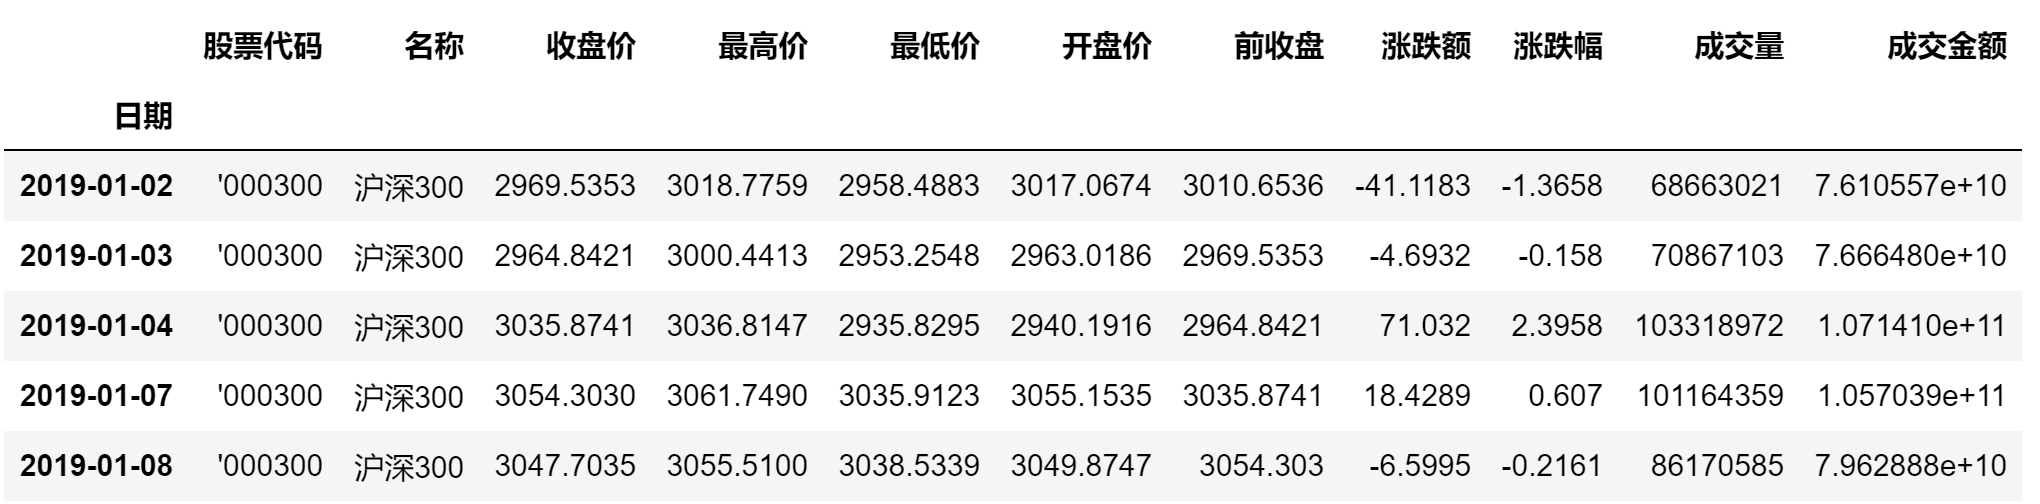

其中定投收益率的简单计算其实就是按照该指数基金的每日收盘价来计算投入资金的份额，然后以年为单位计算累积投入资金的盈利或者亏损的百分比。

<hr>

#### 需要完成的任务
1. 假设定投的金额是500元，每周定投一次，据此计算2019年对**沪深300指数**基金进行定投的收益率
2. 假设定投的金额是500元，每周定投一次，据此**分别**计算从2002年开始到2019年，每年定投**沪深300指数基金**的收益率并将结果可视化
3. 探索不同的定投策略，看看你能否得到更好的定投收益呢？通过改变定投策略，在2018年和2019年获得**平均收益率前10名的同学将获得的本次作业的额外加分**。

注：不同的定投策略可以是改变定投周期（比如从每周定投到每月定投），改变定投金额（比如从固定金额到固定比例），设定止损或者止盈策略等等。

#### 建议和流程：
1. 加载模块 - 常见的numpy/pandas/datetime/matplotlib等
2. 定义参数 - 用于基金定投的一些参数；比如定投金额，定投周期等
3. 数据获取 - 定义get_data()函数用于获取数据 （hint: pandas的read_csv()函数） 
4. 数据预处理 - 调用pandas对象的head()方法预览少量数据
5. 数据可视化 - 调用pandas对象的plot()方法进行简单的数据可视化
6. 数据分析 - 定义invest()函数实现定投功能
7. 结果评估 - 输出分析结果并可视化

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime,timedelta,date
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']='FangSong'
plt.rcParams['axes.unicode_minus']=False

# 1.导入数据并简单查看

In [2]:
# 导入我们下载好的沪深300基金数据集
data=pd.read_csv('./000300.csv',encoding='gbk')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4403 entries, 0 to 4402
Data columns (total 12 columns):
日期      4403 non-null object
股票代码    4403 non-null object
名称      4403 non-null object
收盘价     4403 non-null float64
最高价     4403 non-null float64
最低价     4403 non-null float64
开盘价     4403 non-null float64
前收盘     4403 non-null object
涨跌额     4403 non-null object
涨跌幅     4403 non-null object
成交量     4403 non-null int64
成交金额    4403 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 412.9+ KB


,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
0,2020-02-28,'000300,沪深300,3940.0488,4031.1453,3928.0663,3988.7274,4084.8759,-144.8271,-3.5454,230275093,3.303589e+11
1,2020-02-27,'000300,沪深300,4084.8759,4110.5275,4067.4408,4084.0782,4073.0152,11.8607,0.2912,181290981,2.820502e+11
2,2020-02-26,'000300,沪深300,4073.0152,4132.7817,4061.1250,4070.0994,4123.8543,-50.8391,-1.2328,261094061,3.660224e+11
3,2020-02-25,'000300,沪深300,4123.8543,4126.7075,4020.9075,4066.3020,4132.8388,-8.9845,-0.2174,244167831,3.722137e+11
4,2020-02-24,'000300,沪深300,4132.8388,4149.0102,4097.1753,4131.8364,4149.4903,-16.6515,-0.4013,212869303,3.263878e+11


In [3]:
#查看数据集是否有缺失值
data.isnull().sum()

日期      0
股票代码    0
名称      0
收盘价     0
最高价     0
最低价     0
开盘价     0
前收盘     0
涨跌额     0
涨跌幅     0
成交量     0
成交金额    0
dtype: int64

# 2.数据预处理

In [4]:
# 将日期列变为datetime类型
data['日期']=pd.to_datetime(data['日期'])
data['日期']=data['日期'].apply(lambda x:datetime.strftime(x,'%Y-%m-%d'))
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4403 entries, 0 to 4402
Data columns (total 12 columns):
日期      4403 non-null object
股票代码    4403 non-null object
名称      4403 non-null object
收盘价     4403 non-null float64
最高价     4403 non-null float64
最低价     4403 non-null float64
开盘价     4403 non-null float64
前收盘     4403 non-null object
涨跌额     4403 non-null object
涨跌幅     4403 non-null object
成交量     4403 non-null int64
成交金额    4403 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 412.9+ KB


,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
0,2020-02-28,'000300,沪深300,3940.0488,4031.1453,3928.0663,3988.7274,4084.8759,-144.8271,-3.5454,230275093,3.303589e+11
1,2020-02-27,'000300,沪深300,4084.8759,4110.5275,4067.4408,4084.0782,4073.0152,11.8607,0.2912,181290981,2.820502e+11
2,2020-02-26,'000300,沪深300,4073.0152,4132.7817,4061.1250,4070.0994,4123.8543,-50.8391,-1.2328,261094061,3.660224e+11
3,2020-02-25,'000300,沪深300,4123.8543,4126.7075,4020.9075,4066.3020,4132.8388,-8.9845,-0.2174,244167831,3.722137e+11
4,2020-02-24,'000300,沪深300,4132.8388,4149.0102,4097.1753,4131.8364,4149.4903,-16.6515,-0.4013,212869303,3.263878e+11


# 3.简单可视化一下近期行情

<Figure size 720x576 with 0 Axes>

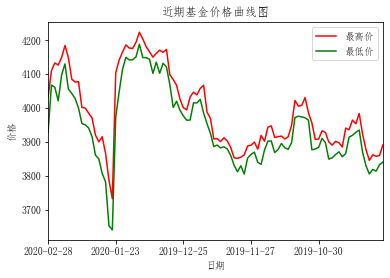

In [5]:
plt.figure(figsize=(10,8))
ax=data[:100].plot('日期','最高价',kind='line',color='red',label="最高价")
data[:100].plot('日期','最低价',kind='line',color='green',label="最低价",ax=ax)
plt.title("近期基金价格曲线图")
plt.xlabel("日期")
plt.ylabel("价格")
plt.legend()
plt.show()

# 4.开始解决任务

## 任务1：假设定投的金额是500元，每周定投一次，据此计算2019年对沪深300指数基金进行定投的收益率

In [6]:
# 首先来分析一下这个问题怎么设计函数，首先需要数据,每次定投的金额、定投周期、定投开始结束时间作为参数
# 然后计算，返回结束时的总投资金额以及总利润，从而计算得到收益率,开始写函数
# 在这里基金价格我以收盘价计算
def invest1(data,start,end,aip,T):
    startday=datetime.strptime(start,'%Y-%m-%d').date()
    endday=datetime.strptime(end,'%Y-%m-%d').date()
    curr=startday
    
    total_aip=0  #总的定投金额
    total_profit=0  #总利润
    total_count=0  #总的基金数
    final_price=0  #最后的基金价格
    while curr<endday:   
        while str(curr) not in data['日期'].values:
            curr+=timedelta(days=1)
            if curr in data['日期'].values:
                break
                
        count=aip/float(data[data['日期']==str(curr)]['收盘价'].values[0])
        total_count+=count
        total_aip+=aip
        #print(f"时间:{curr},拥有的基金总数:{total_count}")
        curr+=timedelta(days=T)
    final_price=float(data[data['日期']==str(curr)]['收盘价'].values[0])
    total_profit=final_price*total_count-total_aip
    return total_aip,total_profit
 
    
#定投500，每周定投利润率
total_aip1,total_profit1=invest1(data,'2019-01-03','2020-01-03',500,7)
print(f"2019年每周定投500方案的总投资为:{total_aip1},总利润为:{total_profit1}")
profit_rate1=total_profit1/total_aip1

print(f"2019年每周定投500方案的收益率为:{profit_rate1*100}%")

2019年每周定投500方案的总投资为:26000,总利润为:2970.154811770186
2019年每周定投500方案的收益率为:11.423672352962253%


## 任务2.假设定投的金额是500元，每周定投一次，据此分别计算从2002年开始到2019年，每年定投沪深300指数基金的收益率并将结果可视化

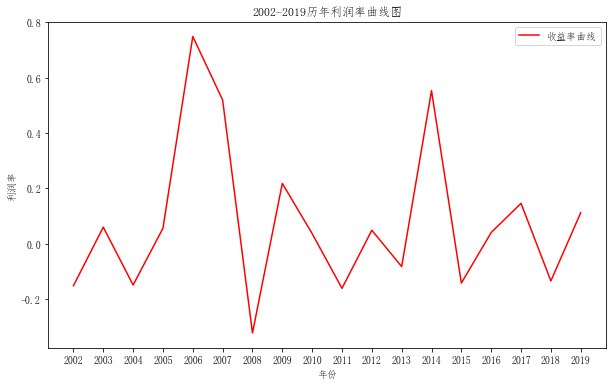

In [7]:
#可以调用问题1的函数，只不过这次我们需要把每次的收益率给存到列表中
def get_allressult():
    for i in range(2002,2020):
        start=date(i,1,4)
        end=date(i+1,1,4)
        a,b=invest1(data,str(start),str(end),500,7)
        profit_rate=b/a
        yield profit_rate

def plot_res():
    results=[]
    for i in get_allressult():
        results.append(i)
    plt.figure(figsize=(10,6))
    plt.plot([i for i in range(2002,2020)],results,color='r',label="收益率曲线")
    plt.title('2002-2019历年利润率曲线图')
    plt.legend()
    plt.xticks([i for i in range(2002,2020)],[i for i in range(2002,2020)])
    plt.xlabel("年份")
    plt.ylabel("利润率")
    plt.show()

plot_res()   

## 任务3：探索不同的定投策略，看看你能否得到更好的定投收益呢？

**想解决这个问题，我们可以像傻瓜一样去尝试所有方法，也可以从现实角度出发，想出尽量合理可行的投资计划再来编写相应的程序探索结果**

*那什么样的投资方法才是能使收益率最高（或者说最大化收益的方法呢），考虑下面的一些现实情况*

+ 定投周期是不是可以改变？变长或变短有没有影响？
+ 当买入成本越低的时候，我们买入收益才会变高
+ 当买入成本低的时候多买入，高的时候少买或者不买
+ 当我们的收益下跌的时候是否继续买入？
+ 当收益下跌时我们是增加买入还是减少买入

所以从上面的问题出发，首先要通过试验得到一些结论：**最好的定投周期、最好的定投金额**

In [8]:
# 开始测试最好的周期(拿2019年数据测试)
def test1():
    res=[]
    T=[2,7,14,21]
    for i in T:
        a,b=invest1(data,'2019-01-05','2020-01-05',500,i)
        res.append(b/a)
    print(f"周期为{T}的收益率分别为:",res)
test1()

周期为[2, 7, 14, 21]的收益率分别为: [0.09668495395843898, 0.10902889853892232, 0.11677334328300067, 0.1040101889935692]


**貌似两周一次定投是可以使收益率最大化的选择**

In [9]:
# 再来试试最好的定投金额
def test2():
    res=[]
    money=[300,500,700,1000]
    for i in money:
        a,b=invest1(data,'2019-01-03','2020-01-03',i,14)
        res.append(b/a)
    print(f"定投金额为{money}的收益率分别为:",res)
test2()

定投金额为[300, 500, 700, 1000]的收益率分别为: [0.11909464892063715, 0.11909464892063733, 0.1190946489206371, 0.11909464892063733]


**定投金额貌似对基金的收益率影响微乎其微**

**现在，有了上面的两个结论，我们知道设置为两周一次定投获益最大，而且定投金额影响不大，只是700元稍稍高一点点点（多个点，表示影响真的不大）**

那再来试着想想策略：
1. 当基金跌（涨跌幅为负）的时候买入；当基金涨的时候部分卖出，防止牛市回吐。
2. 设置一个止盈点，帮助我们及时退出，不会碰到基金低谷导致全亏回去。这个时候我们可以提出钱，然后继续定投，由于我们赚了钱，所以这个时候投资金额和周期都可以变化一下。
3. 去研究一下经济学投资规律，看有没有什么好的数学模型可以借用。

然后去知网等网站查了相关的文献，得到了一些有启发的信息。
比如卖出金额函数模型：
<img src="http://kns.cnki.net/KXReader//Detail/GetImg?filename=images/SYKI201917024_02600.jpg&amp;uid=WEEvREcwSlJHSldRa1Fhb09pSnNvVW4zNmdWaHRwOUtpRnJDLzM0UmQvaz0=$9A4hF_YAuvQ5obgVAqNKPCYcEjKensW4ggI8Fm4gTkoUKaID8j8gFw!!">

<img src="http://kns.cnki.net/KXReader/Detail//GetImg?filename=images/SJYX201904009_02000.jpg&uid=WEEvREcwSlJHSldRa1Fhb09pSnNvVW4zNmdWaHRwOUtpRnJDLzM0UmQvaz0=$9A4hF_YAuvQ5obgVAqNKPCYcEjKensW4ggI8Fm4gTkoUKaID8j8gFw!!">

<img src="http://kreader.cnki.net/Kreader/OpenFile.ashx?dbCode=cdmd&doc=1017728235.nh&tabelName=CMFD201801&format=png&uid=WEEvREcwSlJHSldRa1Fhb09pSnNvVW4zNmdWaHRwOUtpRnJDLzM0UmQvaz0=$9A4hF_YAuvQ5obgVAqNKPCYcEjKensW4ggI8Fm4gTkoUKaID8j8gFw!!&page=78&mpc=%2085&r=0.09565568401881297">

### 通过上面的分析还有看了这些文章的结论，都反映一个问题，跌的时候买入，设置止损，并且定投金额要随时变化

但是我们怎么做到底部买入并且还能控制定投金额变化呢，这就需要我们的定投金额与我们的收益率之间存在某种函数关系：

$定投金额=固定金额*(1+\alpha收益率)$

对于这个公式，我们收益时就可以减少买入，也就相当于限制了收益率；而亏损时会追加买入，符合底部买入的思想，现在就是找找最合适的$\alpha$是多少了

In [10]:
#我们制定的定投策略
def invest2(data,start,end,aip,T,alpha):
    startday=datetime.strptime(start,'%Y-%m-%d').date()
    endday=datetime.strptime(end,'%Y-%m-%d').date()
    curr=startday
    
    total_aip=0  #总的定投金额
    total_profit=0  #总利润
    total_count=0  #总的基金数
    final_price=0  #最后的基金价格
    while curr<endday:   
        while str(curr) not in data['日期'].values:
            curr+=timedelta(days=1)
            if curr in data['日期'].values:
                break
        last=float(data[data['日期']==str(curr)]['收盘价'].values[0])    
        count=aip/float(data[data['日期']==str(curr)]['收盘价'].values[0])
        total_count+=count
        total_aip+=aip
        total_profit=last*total_count-total_aip
        total_rate=total_profit/total_aip
        #print(f"时间:{curr},拥有的基金总数:{total_count}")
        curr+=timedelta(days=T)
        aip=aip*(1-total_rate*alpha)
    return total_aip,total_profit

# 固定金额设为700（定投金额随获益率变化），每周定投一次
total_aip21,total_profit21=invest2(data,'2018-01-02','2019-01-02',700,7,0.1)
print(f"2018年每周定投金额变动方案的总投资为:{total_aip21},总利润为:{total_profit21}")
profit_rate21=total_profit21/total_aip21
print(f"2018年每周定投金额变动方案的收益率为:{profit_rate21*100}%")

2018年每周定投金额变动方案的总投资为:40839.622053864405,总利润为:-6389.336974125938
2018年每周定投金额变动方案的收益率为:-15.644946384907483%


# 当我们满怀期待想看收益的时候，现实泼了一盆凉水，纳尼？2018-2019基金定投收益率是负的，一直亏？？？

我冷静了一下，又回去看了一下之前可视化的图（2002-2019历年利润变化的图），发现2018年就是负的。现在就有两种选择：

第一，2018买入一直放到2020，看看结果如何。

第二，直接放弃2018买入（或者2018年部分时间买入），然后等2019年再买

同样的，试试这两种策略的结果

In [11]:
# 2018买入一直放到2020
total_aip,total_profit=invest2(data,'2018-01-02','2020-01-02',700,7,1)
print(f"2018年到2020每周定投金额变动方案的总投资为:{total_aip},总利润为:{total_profit}")
profit_rate=total_profit/total_aip
print(f"2018年到2020每周定投金额变动方案的收益率为:{profit_rate*100}%")

# 改变一下alpha看还能不能优化
def test3():
    alpha=[0.1,0.2,0.4,0.6,0.8,0.9,1]
    for i in alpha:
        total_aip,total_profit=invest2(data,'2018-01-02','2020-01-02',700,7,i)
        profit_rate=total_profit/total_aip
        print(f"alpha为{i}时，2018年到2020每周定投金额变动方案的收益率为:{profit_rate*100}%")
test3()

2018年到2020每周定投金额变动方案的总投资为:298365.59443396854,总利润为:60841.79612756439
2018年到2020每周定投金额变动方案的收益率为:20.391693031157896%
alpha为0.1时，2018年到2020每周定投金额变动方案的收益率为:12.733426950156309%
alpha为0.2时，2018年到2020每周定投金额变动方案的收益率为:13.482286588181355%
alpha为0.4时，2018年到2020每周定投金额变动方案的收益率为:15.268286539116186%
alpha为0.6时，2018年到2020每周定投金额变动方案的收益率为:17.198962447470016%
alpha为0.8时，2018年到2020每周定投金额变动方案的收益率为:18.955370443819692%
alpha为0.9时，2018年到2020每周定投金额变动方案的收益率为:19.7149779035508%
alpha为1时，2018年到2020每周定投金额变动方案的收益率为:20.391693031157896%


**最好的alpha好像是1，说明见好就收（赚了钱就跑）还是有一定道理的**

In [12]:
# 再来试试2018部分时间买入，2019全年定投的结果
def test4():
    total_aip1,total_profit1=invest2(data,'2018-02-02','2018-04-02',700,7,1)
    profit_rate1=total_profit1/total_aip1
    total_aip2,total_profit2=invest2(data,'2019-01-02','2020-01-02',700,7,1)
    profit_rate2=total_profit2/total_aip2
    profit_rate=(profit_rate1+profit_rate2)/2
    print(f"alpha为1时，2018年部分时间定投2019到2020每周定投金额变动方案的收益率为:{profit_rate*100}%")
test4() 

alpha为1时，2018年部分时间定投2019到2020每周定投金额变动方案的收益率为:8.145323608096566%


**我尝试了2018年各种月份组合，就是没办法提高收益率，所以还是再看看只定投2019年的情况吧**

In [13]:
def test5():
    total_aip,total_profit=invest2(data,'2019-01-02','2020-01-02',700,7,1)
    profit_rate=total_profit/total_aip
    print(f"alpha为{1}时，2019年到2020每周定投金额变动方案的收益率为:{profit_rate*100}%")
test5()

alpha为1时，2019年到2020每周定投金额变动方案的收益率为:19.76024566813114%


### 总结：
最终的策略是2018-2020一直定投，定投周期为一周，定投金额为：
700*(1-$\alpha$*目前的总收益率)
其中$\alpha$最好的取值为1

在2018-2020得到的最大收益率为20.4%

# 不足与改进：
不足之处在于我对金融投资的了解还不够，可能想到的影响因素没有很全面。当然对于基金投资来说本来就是有风险的事，想要稳赚不赔还是很难的。

改进：我也想过用svr或者神经网络对模型进行拟合预测，找到什么时候是最低价，然后买入，什么时候是最高价然后全部卖出。但是这样太理想化，对于数据集我们是从未来看过去的事，换句话说，我们只要对数据涨跌幅排个序，然后找到最低价的时候买入，最高价的时候卖出，这个时候的收益率肯定是最大的，但是这个还是定投吗？当一个事后诸葛亮应该不是这次数据分析的目的，所以还是应该想一种定投策略可以使它对于未来的定投有指导作用，那么 $定投金额=固定金额*(1+\alpha收益率)$ 这个策略对定投就很有帮助